In [25]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [14]:
import os
dir = '/Users/signapoop/Desktop/autotune'
os.chdir(dir)
from autotune.core.HyperbandOptimiser import HyperbandOptimiser
from autotune.core.RandomOptimiser import RandomOptimiser
from autotune.core.CIFAR10_problem2 import CIFAR10_problem2
from autotune.core.utils import best_value

In [6]:
path = '/Users/signapoop/Desktop/autotune/autotune/analysis'
os.chdir(path)
file = open("cifar2.pkl",'rb')
object_file = pickle.load(file)
file.close()

# Unpack file
hyper_opt = object_file[0]
random_opt = object_file[1]

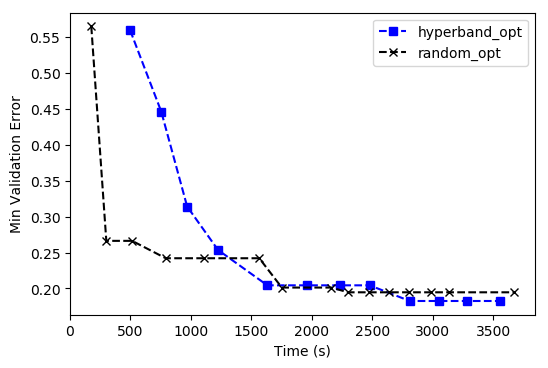

In [8]:
# Plot convergence
fig, ax = plt.subplots(1,1, figsize=(6, 4), dpi=100)
ax.plot(hyper_opt.checkpoints, hyper_opt.Y_best, '--bs', label='hyperband_opt')
ax.plot(random_opt.checkpoints, random_opt.Y_best, '--kx', label='random_opt')
plt.ylabel('Min Validation Error'); plt.xlabel('Time (s)');
plt.legend()
plt.show()

In [30]:
hps = hyper_opt.arms[0].keys()
arms = {}
for hp in hps:
    arms[hp] = [arm[hp] for arm in hyper_opt.arms]

In [31]:
hps

['n_units_2',
 'n_units_3',
 'n_units_1',
 'learning_rate',
 'batch_size',
 'n_resources']

In [32]:
if 'n_resources' in hps:
    hps.remove('n_resources')

In [33]:
input_dir = '/Users/signapoop/Desktop/data/'
output_dir = '/Users/signapoop/Desktop/autotune/autotune/sandpit/checkpoint/'
problem = CIFAR10_problem2(input_dir, output_dir)

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
('Using GPUs? :', False)


In [34]:
ranges = {}
for hp in hps:
    ranges[hp] = [problem.domain[hp].get_min(), problem.domain[hp].get_max()]

In [35]:
ranges

{'batch_size': [32, 512],
 'learning_rate': [-6, 0],
 'n_units_1': [4, 8],
 'n_units_2': [4, 8],
 'n_units_3': [4, 8]}

In [36]:
labels = {}
for hp in hps:
    labels[hp] = hp
    if problem.domain[hp].scale == 'log':
        arms[hp] = np.log(arms[hp]) / np.log(problem.domain[hp].logbase)
        labels[hp] = labels[hp] + '_log'

In [45]:
# Plot parallel coordinates with plotly
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Parcoords(
        line = dict(color = hyper_opt.Y,
                   colorscale = 'Jet',
                   showscale = True,
                   reversescale = True,
                   cmin = 0,
                   cmax = 1),
        dimensions = [
            dict(range = ranges[hp],
                 label = labels[hp], values = arms[hp]) for hp in hps
        ]
    )
]

py.iplot(data, filename = 'parcoords-advanced', image='png', width=250)

In [44]:
hyper_opt.fx_opt

0.18259999999999998

In [43]:
hyper_opt.arm_opt

{'batch_size': 112,
 'learning_rate': 0.0014608877371390437,
 'n_resources': 81.0,
 'n_units_1': 177,
 'n_units_2': 45,
 'n_units_3': 165}